# Overtime Work Analysis based on Boston Employee Earnings Report
Keran Li, kl2993@columbia.edu

## 1. Project Summary:
### Motivation:
To analyze the correlation between the work type and its overtime work income.
### Model Define:
To do calssification about weather a person have overtime work income or not bsed on his work department, title and regular income.
### Procedure:
1. Data Gathering and Cleansing
2. Elementary Data Analysis
3. Define the Classification Problem and its Analysis
4. Machine Learning Models

### Conclusion: 
1. Logistic Regression model works good for this classification problem, based on the ROC, R-square and Model Robestness.
2. The overtime work income has strong correlations with the person's work department, title and regular income. 
3. 30% of total people have over time income.
4. People with medium regular income have higher chance to work overtime.
3. Yearly slighly increasing trends of overtime work.
4. 17% of total titles, everyone with that title has overtime income.
5. The hightest overtime income are among people with regular income between 50,000 to 150,000
6. Specific titles and departments have significant higher percentage of overtime work people than others based on the feature selection of logistic regression and decision tree models:

Results shown above:

The important features are shown in the top 10 for both models: 'Teacher'

In [58]:
print(df_coeffs)
print(df_coeffs2)
set(df_coeffs.index).intersection( df_coeffs2.index)

                                      name      coef
1928                  TITLE_Superintendent  7.997773
1990                         TITLE_Teacher  7.888972
1162                      TITLE_Headmaster  7.256536
1554                TITLE_Principal Middle  7.181622
994   TITLE_FCommissioner/Chief of theDept  6.950868
1364                           TITLE_Nurse  6.772847
1738   TITLE_SpEd Support Svcs Coordinator  6.757421
1575     TITLE_Program Director (Basas 9A)  6.480653
873          TITLE_Director Of Instruction  6.284845
                                          name  feature_importance
1990                             TITLE_Teacher            0.262931
1454                      TITLE_Police Officer            0.064028
1063                        TITLE_Fire Fighter            0.049562
135   DEPARTMENT NAME_Boston Police Department            0.034593
133     DEPARTMENT NAME_Boston Fire Department            0.021275
1396                    TITLE_Paraprofessional            0.020465
2

{1990}

### Insights:
1. Labor Regulation: Some titles, such as teachers, and some departments, such as Police Department, have higher percentage of overtime work people, the regulation department should pay more attention to their benefits and regulate their overtime work income.
2. Labor Management: The higher chance of overtime work can indicate the the lackness of labor force in that specific title and department. Machine learning models can help balance the labor distribution among titles and departments based on its feature selection results.
3. People's work behavior: based on the general yearly increasing of overtime work percentage from year 2013-2017, the reasons behind this might be the housing price and living cost.
4. Teacher is the group which has the highest number of overtime work people: we should be more care about their benefits and personal health.

### Improvement:
1. To further analyze the correlation between people's regular income and overtime income, such as the threshold of start and stop work overtime.
2. To predict the overtime income among people with overtime income, instead of do the classification.
3. To build more machine learning models for solid outcome.
4. To enlarge the dataset, such as including more cities.

## 2. Data Gathering and Cleansing:

i. Read Boston Employee Earnings Report from year 2013-2017 and label year column

ii. Combine all the data in to one dataset.the number of total observations is 110895.

iii. Remove redundant column region_2 which contains same information as region_1 does

iv. Change data type and integrate string for further analysis

v. Fill the NA value with 0, since for this dataset, NA represents 0

In [1]:
# Import all the packages we need
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [2]:
# Read Boston Employee Earnings Report from year 2013-2017 and label year column
data1=pd.read_csv('https://data.boston.gov/dataset/418983dc-7cae-42bb-88e4-d56f5adcf869/resource/70129b87-bd4e-49bb-aa09-77644da73503/download/employee-earnings-report-2017.csv')
data1['year']=2017
data2=pd.read_csv('https://data.boston.gov/dataset/418983dc-7cae-42bb-88e4-d56f5adcf869/resource/8368bd3d-3633-4927-8355-2a2f9811ab4f/download/employee-earnings-report-2016.csv',encoding='latin-1')
data2['year']=2016
data3=pd.read_csv('https://data.boston.gov/dataset/418983dc-7cae-42bb-88e4-d56f5adcf869/resource/2ff6343f-850d-46e7-98d1-aca79b619fd6/download/employee-earnings-report-2015.csv',encoding='latin-1')
data3['year']=2015
data4=pd.read_csv('https://data.boston.gov/dataset/418983dc-7cae-42bb-88e4-d56f5adcf869/resource/941c9de4-fb91-41bb-ad5a-43a35f5dc80f/download/employee-earnings-report-2014.csv',encoding='latin-1')
data4['year']=2014
data5=pd.read_csv('https://data.boston.gov/dataset/418983dc-7cae-42bb-88e4-d56f5adcf869/resource/fac6a421-72fb-4f85-b4ac-4aca1e32d94e/download/employee-earnings-report-2013.csv',encoding='latin-1')
data5['year']=2013

In [3]:
# Combine all the data in to one dataset
data = data1.append(data2)
data = data.append(data3)
data = data.append(data4)
data = data.append(data5)
len(data)

110895

In [4]:
data.columns

Index(['DEPARTMENT', 'DEPARTMENT NAME', 'DEPARTMENT_NAME', 'DETAIL', 'DETAILS',
       'INJURED', 'NAME', 'OTHER', 'OVERTIME', 'POSTAL', 'QUINN',
       'QUINN/EDUCATION INCENTIVE', 'REGULAR', 'RETRO', 'TITLE',
       'TOTAL EARNINGS', 'ZIP', 'year'],
      dtype='object')

The number of total observations is 110895.
The number of columns is 18 and its names show above.

In [5]:
# Data preprocessing, including change data type and integrate string for further analysis
cols=[ 'REGULAR', 'RETRO', 'OTHER',
       'OVERTIME', 'INJURED', 'DETAIL', 'QUINN/EDUCATION INCENTIVE',
       'TOTAL EARNINGS']
for col in cols:
    data[col]=data[col].map(lambda x:str(x).replace('$', ''))
    data[col]=data[col].map(lambda x:str(x).replace(',', ''))
    data[col]=data[col].map(lambda x:str(x).replace('(', ''))
    data[col]=data[col].map(lambda x:str(x).replace(')', ''))
    data[col]=data[col].map(lambda x:float(x))
    data[col]=data[col].fillna(0)

## 3. Exploratory Data Analysis:

### 3.1 Continues Variable Analysis:

'REGULAR', 'RETRO', 'OTHER','OVERTIME', 'INJURED', 'DETAIL', 'QUINN/EDUCATION INCENTIVE','TOTAL EARNINGS'

i. Correlation Matrix

ii. Boxplot

iii. Distribution

iv. Scatterplot


##### Conclusion:

Delete columns most of which are NA values: 'OTHER','INJURED','DETAIL','QUINN/EDUCATION INCENTIVE'

Delete columns have strong correlation between them: 'TOTAL EARNINGS' and 'REGULAR'

Delete columns can leak the infomation about the 'OVERTIME': 'RETRO'

Finally, I chose 'REGULAR' as the continuous predictor for predicting the 'OVERTIME', the plot above shows the correlation between 'Regular' and 'OVERTIME':

###### The plot above indicates that with the increasing of regular income, the overtime income increase then decrease. 
###### The hightest overtime income are among regular income between 50,000 to 150,000.

Text(0,0.5,'Overtime Income')

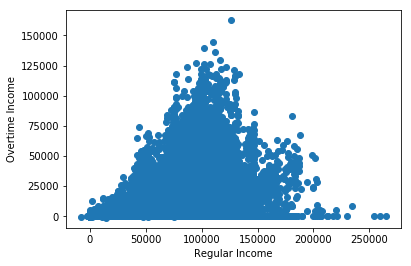

In [6]:
plt.scatter(data['REGULAR'],data['OVERTIME'])
plt.xlabel('Regular Income')
plt.ylabel('Overtime Income')

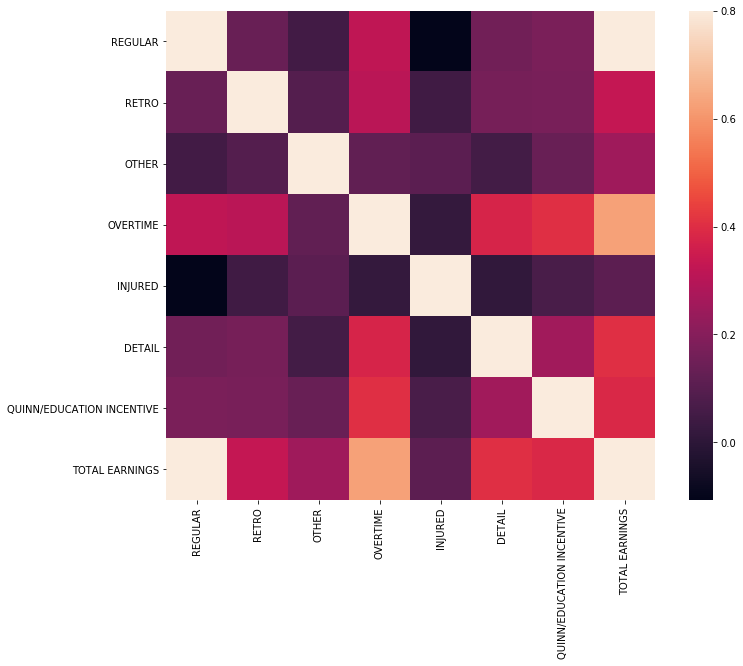

In [7]:
#correlation matrix
corrmat = data[cols].corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

In [8]:
# Correlation with 'OVERTIME'
corrmat['OVERTIME'].sort_values()

INJURED                      0.017512
OTHER                        0.121678
RETRO                        0.310906
REGULAR                      0.318591
DETAIL                       0.377240
QUINN/EDUCATION INCENTIVE    0.406303
TOTAL EARNINGS               0.626955
OVERTIME                     1.000000
Name: OVERTIME, dtype: float64

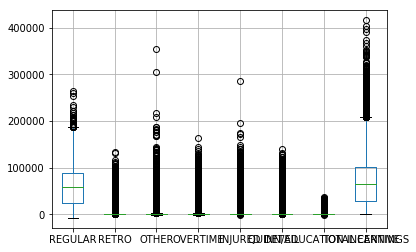

In [9]:
# Boxplot
data[cols].boxplot()

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


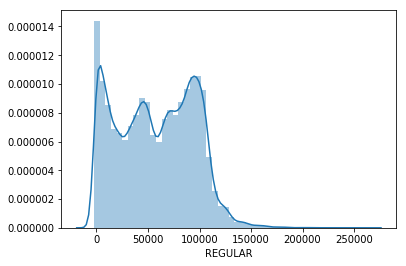

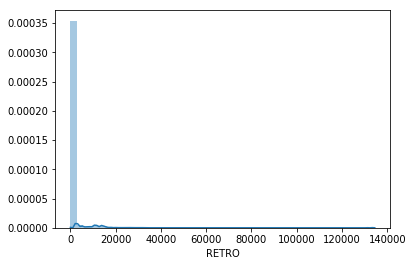

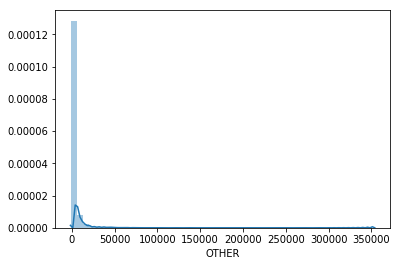

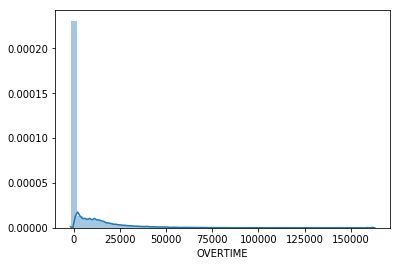

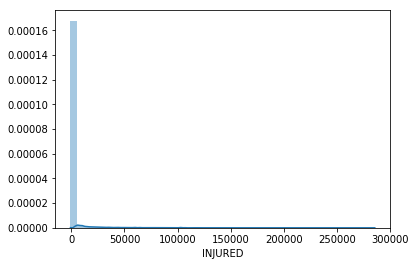

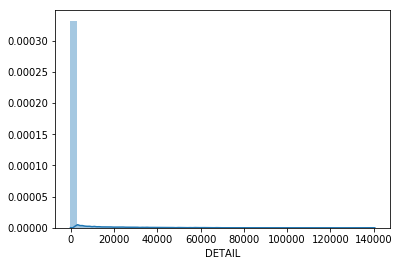

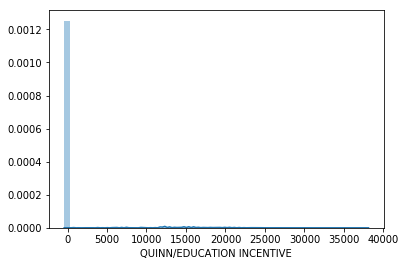

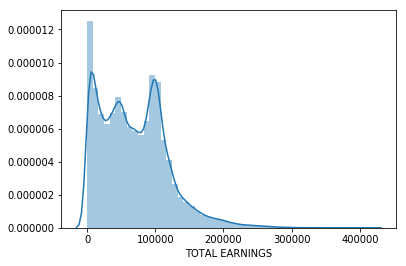

In [10]:
# Distribution
for col in cols:
    plt.figure()
    sns.distplot(data[col])

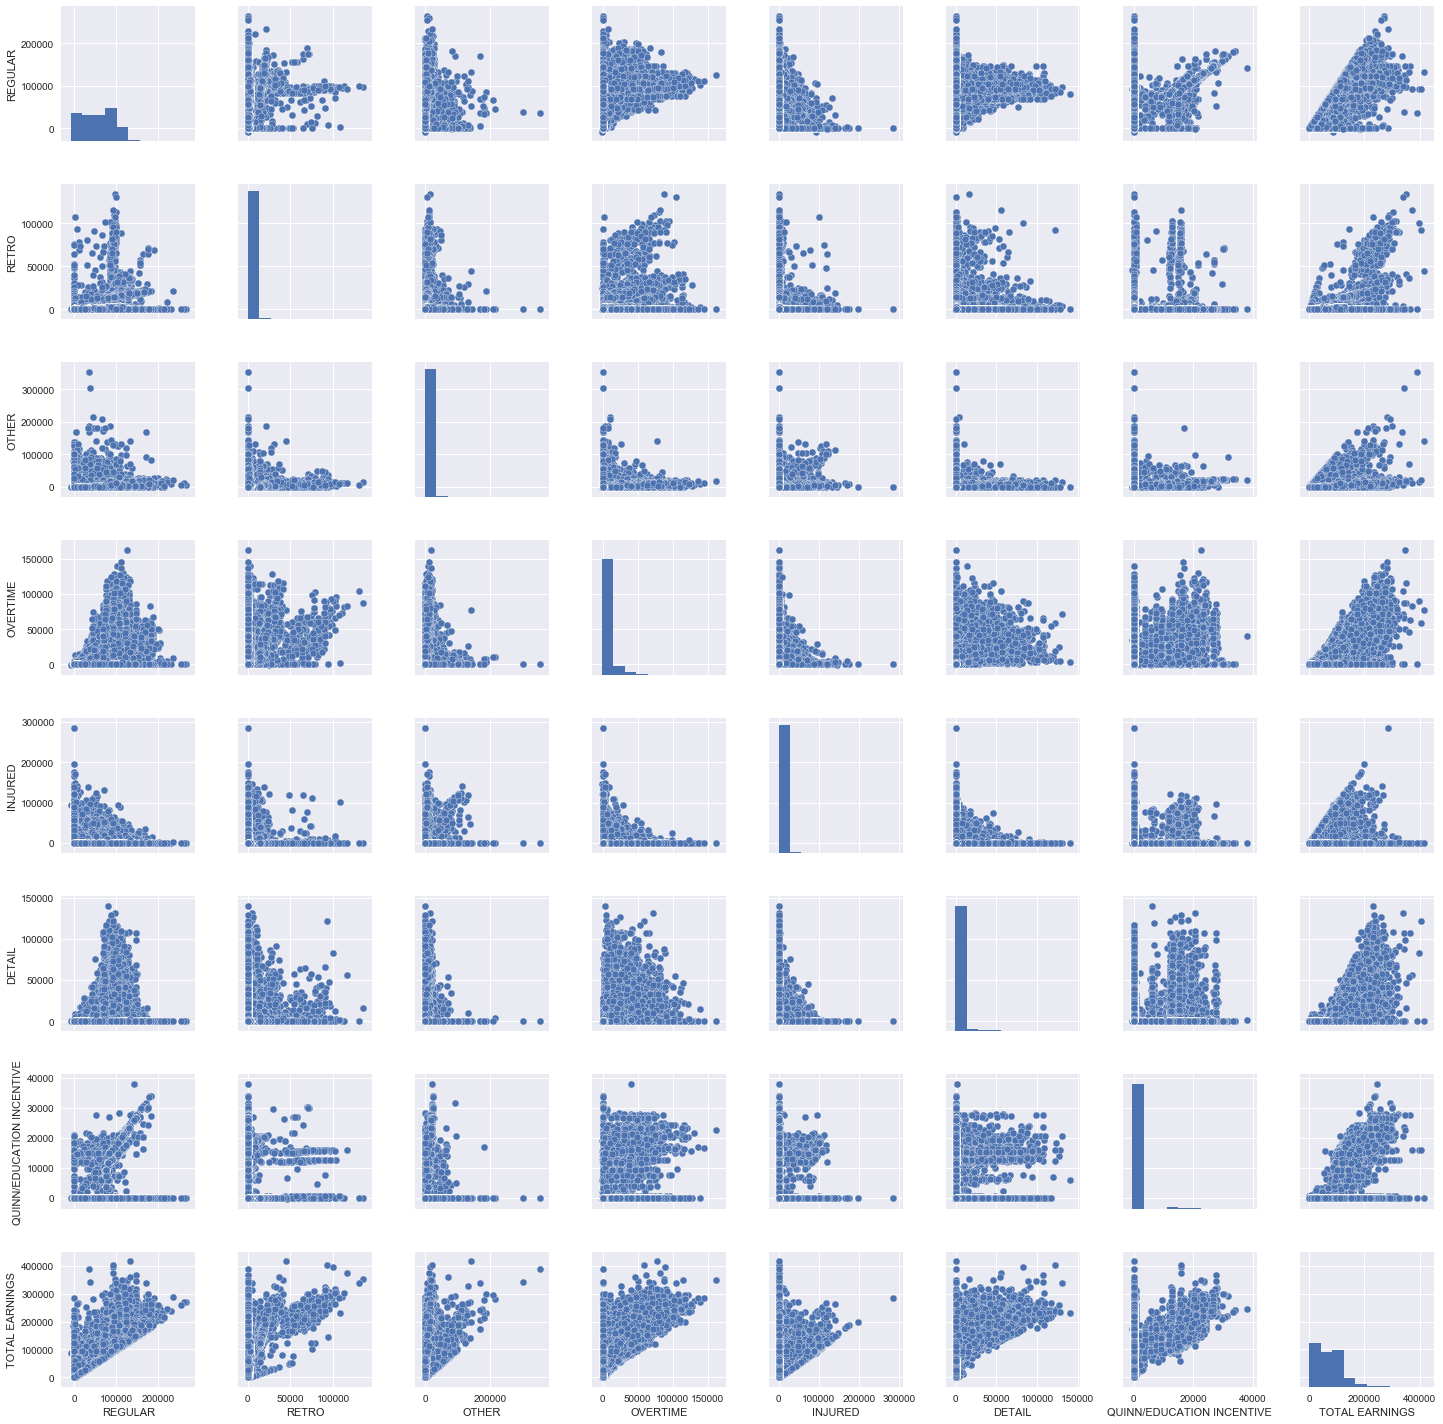

In [11]:
# Scatterplot
sns.set()
sns.pairplot(data[cols], size = 2.5)
plt.show();

### 3.2 Categorical Variable Analysis:

### 3.2.1 Boxplot:

For different department and title, the boxplot of overtime income various a lot, indicating the significant differences of overtime income between department and title.

For years, there is no strong differences of overtime income. The highest overtime income was in year 2015, higher than 150,000.

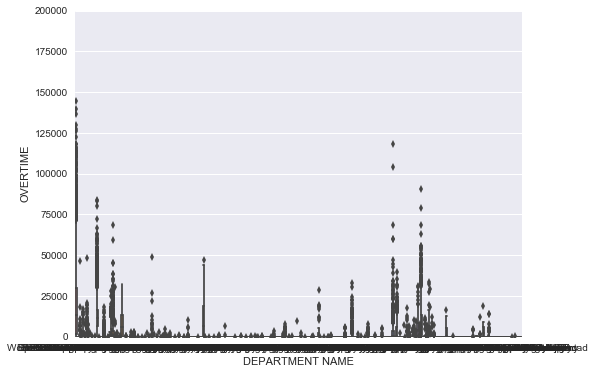

In [12]:
# Boxplot of 'DEPARTMENT NAME'
var = 'DEPARTMENT NAME'
df = pd.concat([data['OVERTIME'], data[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y='OVERTIME', data=df)
fig.axis(ymin=0, ymax=200000);

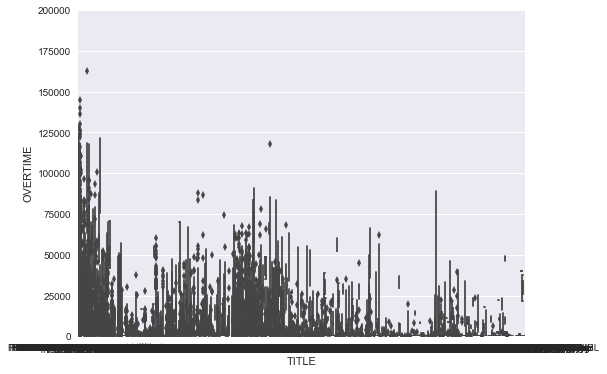

In [13]:
# Boxplot of 'TITLE'
var = 'TITLE'
df = pd.concat([data['OVERTIME'], data[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y='OVERTIME', data=df)
fig.axis(ymin=0, ymax=200000);

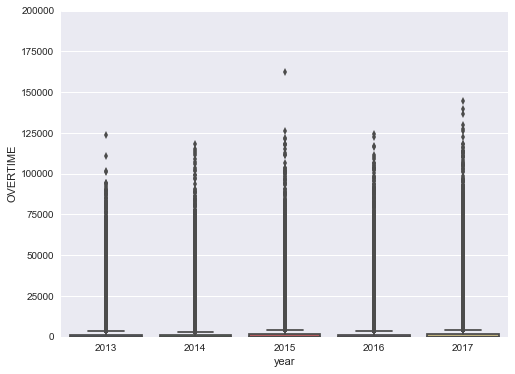

In [14]:
# Boxplot of 'year'
var = 'year'
df = pd.concat([data['OVERTIME'], data[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y='OVERTIME', data=df)
fig.axis(ymin=0, ymax=200000);

### 3.2.2 Top 20 'Department Name' and 'Title' with Highest Mean of Overtime Income 

In [15]:
# Top 20 'Department Name' and its mean of overtime income
data.groupby(['DEPARTMENT NAME'])['OVERTIME'].mean().sort_values(ascending=False)[1:20]

DEPARTMENT NAME
Boston Fire Department            12563.455142
Property Management               10422.223100
Public Works Department            9529.176166
BPS Facility Mgmt/A & R            7759.411111
Cemetery Division                  7003.385714
Inspectional Services Dept         4713.224870
Election Division                  4357.157253
Ofc of Strts, Trnsp & Sani         3941.744737
Parks Department                   3919.139907
Traffic Division                   3856.337607
Office of Streets                  3788.526364
BPS Facility Management            3201.093679
BPS School Safety Service          2978.229691
Public Facilities Department       2930.684531
Boston Retirement System           2189.945238
City Clerk                         2066.219677
Dpt of Innovation & Technology     1886.833810
Treasury-Treasury Division         1633.351887
State Boston Retirement Syst       1325.858462
Name: OVERTIME, dtype: float64

In [16]:
# Top 20 'Department Name' and its mean of overtime income
data.groupby(['TITLE'])['OVERTIME'].mean().sort_values(ascending=False)[1:20]

TITLE
Police Lieutenant/Hdq Dispatch    94062.018667
Police Sergeant/Hdq Dispatcher    92835.468000
Police Sergeant/Bomb Squad        67263.594000
Wkg Frprs Elec Equip Repairprs    66525.687143
Frprs Electrical Equip Rprprs     66430.303333
Police Sergeant/Mobile Oper       58090.217000
Dir-Transportation (BFD)          52334.978000
Pr Admin Clerk 31                 51995.720000
Police Captain                    51685.410714
Police Lieut/Paid Detail Ser      51431.335000
Police Sergeant/CHF RADIO DISP    50586.347826
Chief Traffic Invest(Cat)         49998.586000
District Fire Chief-Asst Dvmtr    49900.140000
Police Sergeant (Det)             48849.422902
Police Lieutenant (Det)           48301.189701
FF (Master of Fire BoatDivMas)    47779.750000
Dir-Signal Service (Bpd)          47172.914000
Spv/UtilityCompliance&Coordnti    47114.900000
Police Lieut (Det)                46339.810000
Name: OVERTIME, dtype: float64

### 3.2.3 Yearly Change on the Mean of Overtime Income: Slightly Increasing

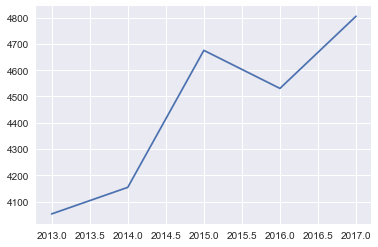

In [17]:
# Yearly Change on the Mean of Overtime Income 
year=data.groupby(['year'])['OVERTIME'].mean()
plt.plot(year.index,year)

## 4. Define the Classification Problem and its Analysis:

i. Assign a new column 'OVERTIME_OR_NOT' with True or False about weather a person has overtime income or not

ii. Analysis against column 'OVERTIME_OR_NOT':

1. What's the percentage of people have over time income?

2. What's the yearly change about the percentage of people have over time income?

3. Top 20 departments with the highest percentage of people have over time income

4. Top 20 titles with the highest percentage of people have over time income

5. The Percentage of Titles with Everyone has Overtime Income 

6. Compare the regular income differences among people with and without overtime income


#### Conclusion: the predictors we chose for classifying overtime or not are reasonable

In [18]:
# Assign a new column with True or False about weather a person has overtime income or not
data['OVERTIME_OR_NOT']=data['OVERTIME']>0

### 4.1 What's the percentage of people have over time income? : Around 30% 

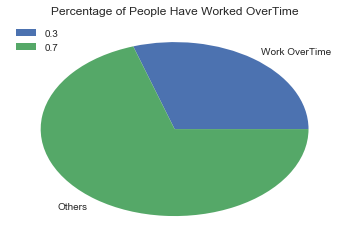

In [19]:
# Pie Plot
perc=round(np.mean(data['OVERTIME_OR_NOT']),2)
plt.pie([perc,1-perc], labels=['Work OverTime','Others'])
plt.title('Percentage of People Have Worked OverTime')
plt.legend([perc,1-perc])

### 4.2 What's the yearly change about the percentage of people have over time income? : Almost the same

<BarContainer object of 5 artists>

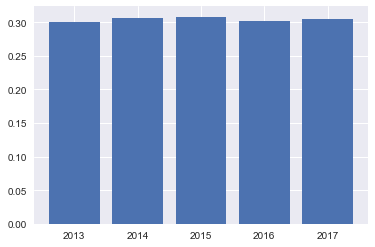

In [20]:
# Barplpt
year=data.groupby(['year'])['OVERTIME_OR_NOT'].mean()
plt.bar(year.index,year)

### 4.3 Top 20 departments with the highest percentage of people have over time income :

In [21]:
data.groupby(['DEPARTMENT NAME'])['OVERTIME_OR_NOT'].mean().sort_values(ascending=False)[1:20]

DEPARTMENT NAME
Boston Fire Department            0.883039
BPS School Safety Service         0.858025
Cemetery Division                 0.857143
Boston Police Department          0.840841
Property Management               0.797844
Ofc of Strts, Trnsp & Sani        0.736842
Treasury-Collecting Division      0.732143
Traffic Division                  0.704264
BPS Facility Management           0.681818
BPS Facility Mgmt/A & R           0.656566
Inspectional Services Dept        0.632609
Election Division                 0.626374
Parks Department                  0.580495
Treasury-Treasury Division        0.528302
Dpt of Innovation & Technology    0.507937
Boston Public Library             0.504744
Office of Streets                 0.500000
BPS Central Kitchen Food Ser      0.500000
Auditing Department               0.486486
Name: OVERTIME_OR_NOT, dtype: float64

### 4.4 Top 20 titles with the highest percentage of people have over time income :

In [22]:
data.groupby(['TITLE'])['OVERTIME_OR_NOT'].mean().sort_values(ascending=False)[1:20]

TITLE
Gen Maint Mech                    1.0
Gen Frprs-Fire Alarm Construct    1.0
Fund Accountant                   1.0
Frprs Electrical Equip Rprprs     1.0
Frpr-Lineperson&Cable Splicers    1.0
Fleet Manager                     1.0
Fleet Main Manager                1.0
First Asst Drawtender##           1.0
First Asst Coll-Trs (Trs/Col)     1.0
FireLieutenant(ScubaDivTech       1.0
FireLieutenant(Adm.ScubaDiver)    1.0
FireFighter(ScubaDiver)-Tech      1.0
Sr Homeland Security Anl ARRA     1.0
Fire Prev Supv(Fire Prot Eng)     1.0
Fire Lt Admn-Technician           1.0
Fire Lt Admn-AdvanceTechnician    1.0
Fire Lieutenant-Technician        1.0
Fire Lieutenant-AdvanceTech       1.0
Gen Main Mech Frprs(Cfm)##        1.0
Name: OVERTIME_OR_NOT, dtype: float64

### 4.5 The Percentage of Titles that everyone with taht title has Overtime Income : 17%

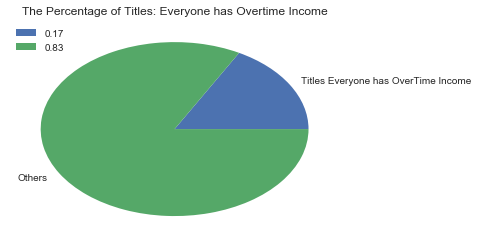

In [23]:
#Pie Plot
perc=round(np.mean(data.groupby(['TITLE'])['OVERTIME_OR_NOT'].mean().sort_values(ascending=False)==1),2)
plt.pie([perc,1-perc], labels=['Titles Everyone has OverTime Income','Others'])
plt.title('The Percentage of Titles: Everyone has Overtime Income')
plt.legend([perc,1-perc])

### 4.6 Compare the regular income differences among people with and without overtime income:

Group people without overtime income have higher variance of regular income.
Group people with overtime income have higher mean of regular income.

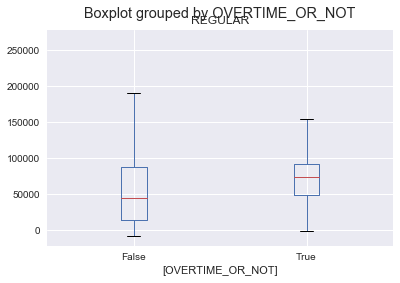

In [24]:
# Boxplot
data[['REGULAR','OVERTIME_OR_NOT']].boxplot(by='OVERTIME_OR_NOT')

## 5. Machine Learning Models:
Here I chose two classification models: logistic regression (linear model) and decision tree (nonlinear model) to compare their performance.

### 5.1 Logistic Regression (linear)

#### Prepare data:

In [25]:
# Define X and y
X=data[['DEPARTMENT NAME','TITLE','REGULAR']]
y=data['OVERTIME_OR_NOT']

In [26]:
# Get dummies
X = pd.get_dummies(X)

In [27]:
# Train Test data split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

#### Run Logistic:

In [28]:
# Logistic Regression
logisticRegr = LogisticRegression(penalty='l1')
logisticRegr.fit(X_train, y_train)
logisticRegr.score(X_test, y_test)
coef=logisticRegr.coef_

#### Model Performance for unbalanced data: 
#### ROC Curve (For the test dataset, the roc curve is higher than 0.98: this model performances very good!)

In [29]:
from sklearn.metrics import roc_curve, auc
n_classes = y.shape
y_score = logisticRegr.decision_function(X_test)
y_test=np.array(y_test)
fpr, tpr, thresholds = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)
print ("Area under the ROC curve : %f" % roc_auc)

Area under the ROC curve : 0.985110


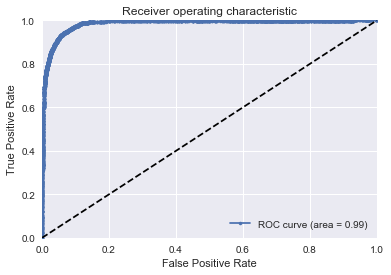

In [30]:
def generate_ROCplot(fpr,tpr,label,roc_auc):
    plt.clf()
    plt.plot(fpr, tpr, '.-',label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()
    
# Plots ROC
generate_ROCplot(fpr,tpr,'LR',roc_auc)

#### Model Interpretation: Feature Selection (Top 20 Features)

In [31]:
# Coef dataframe
name=X.columns
df_coeffs = pd.DataFrame(columns=['name','coef'])
df_coeffs['name']=name
df_coeffs['coef']=abs(coef[0][:])

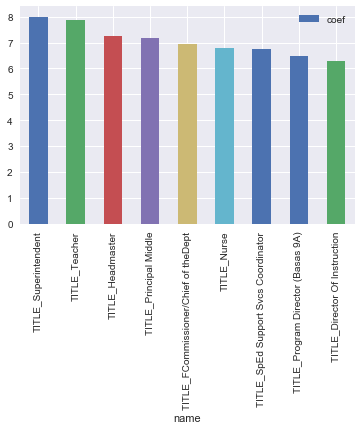

In [32]:
# Plot top 20 coefs
df_coeffs=df_coeffs.sort_values(['coef'],ascending=False)[1:10]
df_coeffs.plot(x='name',y='coef',kind='bar')
plt.show()

#### Model Robstness: the performances of 5 folds are similar, indicating our model is robust!

In [35]:
from sklearn.model_selection import cross_val_score
scores= cross_val_score(logisticRegr, X_train, y_train, cv=5)

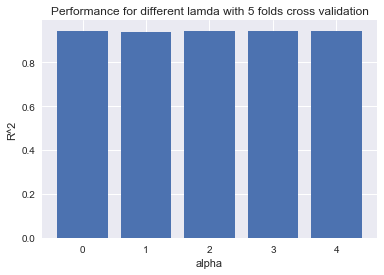

In [36]:
plt.bar(range(len(scores)),scores)
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.title('Performance for different lamda with 5 folds cross validation' )
plt.show()

### 5.2 Decision Tree Classification (non-linear):

#### Prepare Data:

In [37]:
# Define X and y
X=data[['DEPARTMENT NAME','TITLE','REGULAR']]
y=data['OVERTIME_OR_NOT']

In [38]:
# Lable character variable
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(X['TITLE'].unique())
X['TITLE']=le.transform(X['TITLE']) 

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [39]:
le = preprocessing.LabelEncoder()
le.fit(X['DEPARTMENT NAME'].astype(str).unique())
X['DEPARTMENT NAME']=le.transform(X['DEPARTMENT NAME'].astype(str)) 

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


#### Run Decision Tree:

In [40]:
# Run Deision Tree with max_depth = 5
from sklearn.tree import DecisionTreeClassifier
# Create linear regression object
regr = DecisionTreeClassifier(max_depth=5,criterion='entropy')

# Train the model using the training sets
regr.fit(X_train, y_train)
regr.score(X_test,y_test)

0.8000811578520222

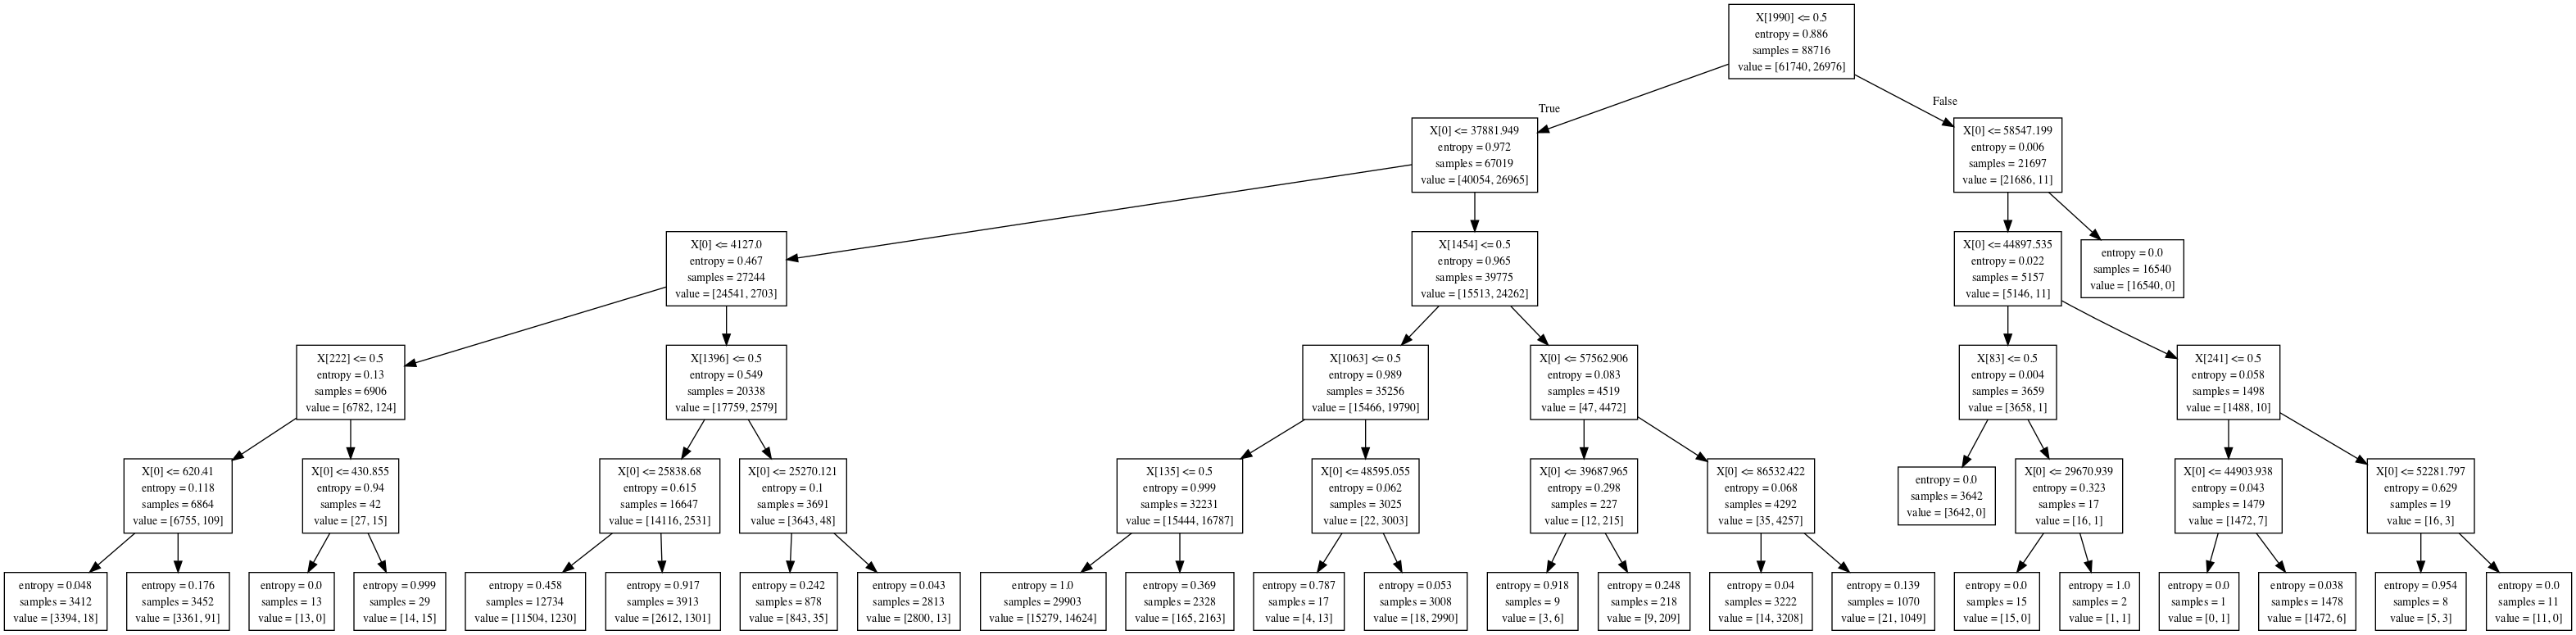

In [41]:
# Show the tree procedure
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import pydotplus
from IPython.display import Image  
dot_data=export_graphviz(regr, out_file=None)
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png())

#### Select Tunning Parameter with Samallest Test Error (Since cross validation is slow here)

In [42]:
# Run Model 
train_error= []
test_error= []
from sklearn.tree import DecisionTreeClassifier
max_depth=range(2,21)
for i in max_depth:
    des = DecisionTreeClassifier(max_depth=i)
    des.fit(X_train, y_train)
    train_error.append(np.mean(np.array(y_train)!=des.predict(X_train)))
    test_error.append(np.mean(np.array(y_test)!=des.predict(X_test)))

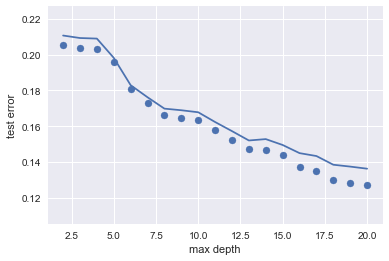

In [43]:
# Plot crossvalidation result
plt.scatter(max_depth,train_error)
plt.plot(max_depth, test_error)
plt.xlabel('max depth')
plt.ylabel('test error')
plt.show();

In [44]:
# Best tunning parameter
best_depth=max_depth[np.argmin(test_error)]
best_depth

20

#### Run the best model:

In [45]:
from sklearn.tree import DecisionTreeClassifier
# Create linear regression object
regr = DecisionTreeClassifier(max_depth=best_depth,criterion='entropy')

# Train the model using the training sets
regr.fit(X_train, y_train)
regr.score(X_test,y_test)

0.8562153388340322

#### Model Performance for unbalanced data: 
#### ROC Curve (For the test dataset, the roc curve is higher than 0.98: this model performances very good!)

In [46]:
n_classes = y.shape
y_score = regr.predict_proba(X_test)[:,1]
y_test=np.array(y_test)
fpr, tpr, thresholds = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)
print ("Area under the ROC curve : %f" % roc_auc)

Area under the ROC curve : 0.941090


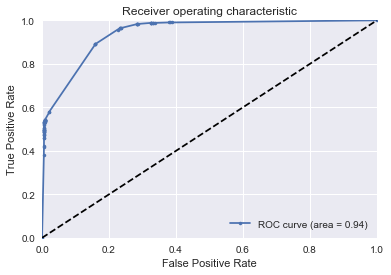

In [47]:
def generate_ROCplot(fpr,tpr,label,roc_auc):
    plt.clf()
    plt.plot(fpr, tpr, '.-',label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()
    
# Plots ROC
generate_ROCplot(fpr,tpr,'LR',roc_auc)

#### Model Interpretation: Feature Selection (Top 20 Features)

In [48]:
coef2=regr.feature_importances_ 

In [49]:
df_coeffs2 = pd.DataFrame(columns=['name','feature_importance'])
df_coeffs2['name']=name
df_coeffs2['feature_importance']=abs(coef2[:])

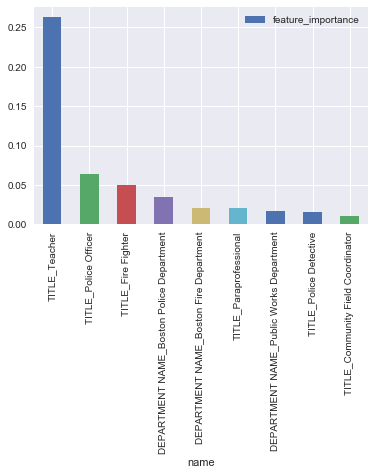

In [50]:
df_coeffs2=df_coeffs2.sort_values(['feature_importance'],ascending=False)[1:10]
df_coeffs2.plot(x='name',y='feature_importance',kind='bar')
plt.show()